In [10]:
import sys
sys.path.append('/home/rotation3/complex-coor-pred/')

import torch
from config import device
from data.MyData import Data
from torch.utils.data import DataLoader

# 如果只是sample的话很简单. 就算从MyData开始sample也是很简单
def sample_only(train_mode, index=0):
    """ 从数据集中取值、计算预测结果并返回
    
    :param train_mode: 从训练集中取数据吗?
    :param index: 选取dataset中的第几个数据?
    """
    train_data_path = '/home/rotation3/complex-coor-pred/data/train22310.3besm2.h5'
    test_data_path = '/home/rotation3/complex-coor-pred/data/valid2000.3besm2.h5'
    xyz_path = '/home/rotation3/complex-coor-pred/data/xyz.h5'
    sorted_train_file = "/home/rotation3/complex-coor-pred/data/sorted_train_list.txt"
    test_file = "/home/rotation3/complex-coor-pred/data/valid_list.txt"

    if train_mode:
        path = train_data_path
        file_list = sorted_train_file
    else:
        path = test_data_path
        file_list = test_file

    ds = Data(path, xyz_path, file_list, train_mode=False)
    embed, atten, coor_label, L, pdb_index = ds[index]
    return embed, atten, coor_label, L, pdb_index

# 提取pred和label，形成数组或者列表
def sample_and_predict(net_pt_name, train_mode, index=0, net_pt_loaded=False, include_x2d=False):
    """ 从数据集中取值、计算预测结果并返回
    
    :param net_pt_name: 要用来预测的模型
    :param train_mode: 从训练集中取数据吗？
    :param index: 选取dataset中的第几个数据？
    :param net_pt_loaded: 为了避免多次调用函数时造成的模型参数重复加载
    """
    train_data_path = '/home/rotation3/complex-coor-pred/data/train22310.3besm2.h5'
    test_data_path = '/home/rotation3/complex-coor-pred/data/valid2000.3besm2.h5'
    xyz_path = '/home/rotation3/complex-coor-pred/data/xyz.h5'
    sorted_train_file = "/home/rotation3/complex-coor-pred/data/sorted_train_list.txt"
    test_file = "/home/rotation3/complex-coor-pred/data/valid_list.txt"

    if train_mode:
        path = train_data_path
        file_list = sorted_train_file
    else:
        path = test_data_path
        file_list = test_file

    ds = Data(path, xyz_path, file_list, train_mode=False)   #此处的train_mode控制蛋白会不会被tunc
    embed, atten, coor_label, L, pdb_index = ds[index]
    embed = embed.to(device)
    atten = atten.to(device)
    coor_label = coor_label.to(device)
    embed.unsqueeze_(0)
    atten.unsqueeze_(0)
    coor_label.unsqueeze_(0)

    if not net_pt_loaded:
        net_pt = torch.load(net_pt_name)

    with torch.no_grad():
        pred_coor_4_steps, pred_x2d = net_pt(embed, atten)
        pred_coor = pred_coor_4_steps[-1]   # 取出最后一个Block预测出的coor
        if include_x2d:    # 如果include_x2d=True, pred_coor与pred_x2d将以元组的形式返回
            pred = (pred_coor, pred_x2d)
    return (pred, coor_label)


# 测试代码
# if __name__ == "__main__":
#     from model.CoorNet import CoorNet
#     model = CoorNet()
#     net_pt_name = "/home/rotation3/complex-coor-pred/model/checkpoint/CoorNet_VII/epoch16.pt"
#     pred, label = sample_and_predict(net_pt_name, index=1000, train_mode=True ,include_x2d=True)
#     torch.save(pred[1], "pred_x2d.npy")


# 计算训练集和测试集的长度分布
train_data_path = '/home/rotation3/complex-coor-pred/data/train22310.3besm2.h5'
test_data_path = '/home/rotation3/complex-coor-pred/data/valid2000.3besm2.h5'
xyz_path = '/home/rotation3/complex-coor-pred/data/xyz.h5'
sorted_train_file = "/home/rotation3/complex-coor-pred/data/sorted_train_list.txt"
test_file = "/home/rotation3/complex-coor-pred/data/valid_list.txt"

train_mode = False
if train_mode:
    path = train_data_path
    file_list = sorted_train_file
else:
    path = test_data_path
    file_list = test_file
test_ls = []
ds = Data(path, xyz_path, file_list, train_mode=False)
L = len(ds)
for i in range(L):
    test_ls.append(ds[i][-2])


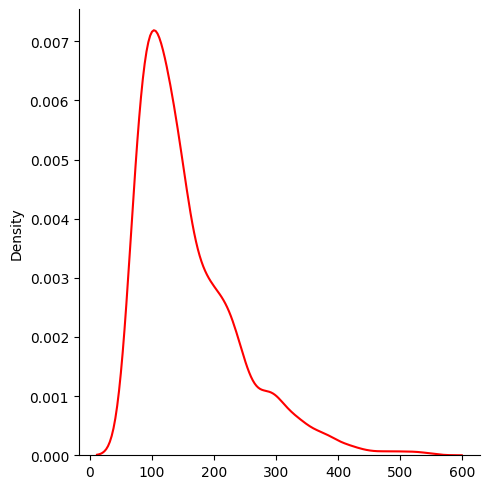

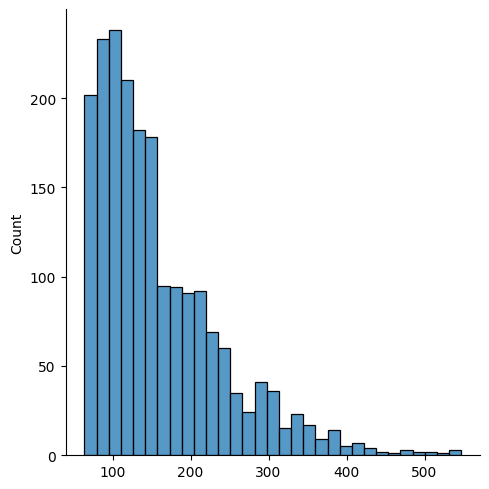

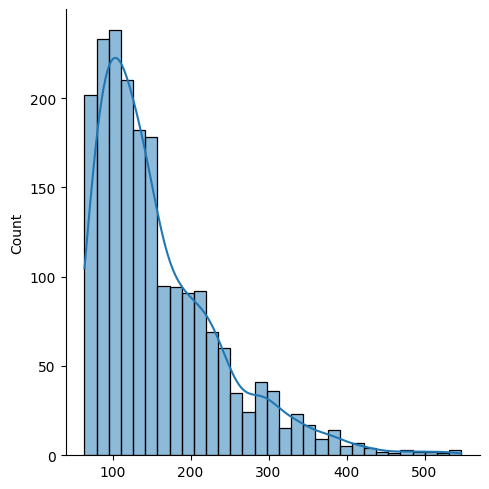

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

test_ls = np.array(test_ls)
sns.displot(test_ls, kind='kde', color='red')
sns.displot(test_ls)
sns.displot(test_ls, kde=True)


In [8]:
import sys
sys.path.append('/home/rotation3/complex-coor-pred/')

import torch
from config import device
from data.MyData import Data
from torch.utils.data import DataLoader

# 如果只是sample的话很简单. 就算从MyData开始sample也是很简单
def sample_only(train_mode, index=0):
    """ 从数据集中取值、计算预测结果并返回
    
    :param train_mode: 从训练集中取数据吗?
    :param index: 选取dataset中的第几个数据?
    """
    train_data_path = '/home/rotation3/complex-coor-pred/data/train22310.3besm2.h5'
    test_data_path = '/home/rotation3/complex-coor-pred/data/valid2000.3besm2.h5'
    xyz_path = '/home/rotation3/complex-coor-pred/data/xyz.h5'
    sorted_train_file = "/home/rotation3/complex-coor-pred/data/sorted_train_list.txt"
    test_file = "/home/rotation3/complex-coor-pred/data/valid_list.txt"

    if train_mode:
        path = train_data_path
        file_list = sorted_train_file
    else:
        path = test_data_path
        file_list = test_file

    ds = Data(path, xyz_path, file_list, train_mode=False)
    embed, atten, coor_label, L, pdb_index = ds[index]
    return embed, atten, coor_label, L, pdb_index

# 提取pred和label，形成数组或者列表
def sample_and_predict(net_pt_name, train_mode, index=0, net_pt_loaded=False, include_x2d=False):
    """ 从数据集中取值、计算预测结果并返回
    
    :param net_pt_name: 要用来预测的模型
    :param train_mode: 从训练集中取数据吗？
    :param index: 选取dataset中的第几个数据？
    :param net_pt_loaded: 为了避免多次调用函数时造成的模型参数重复加载
    """
    train_data_path = '/home/rotation3/complex-coor-pred/data/train22310.3besm2.h5'
    test_data_path = '/home/rotation3/complex-coor-pred/data/valid2000.3besm2.h5'
    xyz_path = '/home/rotation3/complex-coor-pred/data/xyz.h5'
    sorted_train_file = "/home/rotation3/complex-coor-pred/data/sorted_train_list.txt"
    test_file = "/home/rotation3/complex-coor-pred/data/valid_list.txt"

    if train_mode:
        path = train_data_path
        file_list = sorted_train_file
    else:
        path = test_data_path
        file_list = test_file

    ds = Data(path, xyz_path, file_list, train_mode=False)   #此处的train_mode控制蛋白会不会被tunc
    embed, atten, coor_label, L, pdb_index = ds[index]
    embed = embed.to(device)
    atten = atten.to(device)
    coor_label = coor_label.to(device)
    embed.unsqueeze_(0)
    atten.unsqueeze_(0)
    coor_label.unsqueeze_(0)

    if not net_pt_loaded:
        net_pt = torch.load(net_pt_name)

    with torch.no_grad():
        pred_coor_4_steps, pred_x2d = net_pt(embed, atten)
        pred_coor = pred_coor_4_steps[-1]   # 取出最后一个Block预测出的coor
        if include_x2d:    # 如果include_x2d=True, pred_coor与pred_x2d将以元组的形式返回
            pred = (pred_coor, pred_x2d)
    return (pred, coor_label)


# 测试代码
# if __name__ == "__main__":
#     from model.CoorNet import CoorNet
#     model = CoorNet()
#     net_pt_name = "/home/rotation3/complex-coor-pred/model/checkpoint/CoorNet_VII/epoch16.pt"
#     pred, label = sample_and_predict(net_pt_name, index=1000, train_mode=True ,include_x2d=True)
#     torch.save(pred[1], "pred_x2d.npy")


# 计算训练集和测试集的长度分布
train_data_path = '/home/rotation3/complex-coor-pred/data/train22310.3besm2.h5'
test_data_path = '/home/rotation3/complex-coor-pred/data/valid2000.3besm2.h5'
xyz_path = '/home/rotation3/complex-coor-pred/data/xyz.h5'
sorted_train_file = "/home/rotation3/complex-coor-pred/data/sorted_train_list.txt"
test_file = "/home/rotation3/complex-coor-pred/data/valid_list.txt"

train_mode = True
if train_mode:
    path = train_data_path
    file_list = sorted_train_file
else:
    path = test_data_path
    file_list = test_file
train_ls = []
ds = Data(path, xyz_path, file_list, train_mode=False)
L = len(ds)
for i in range(L):
    train_ls.append(ds[i][-2])


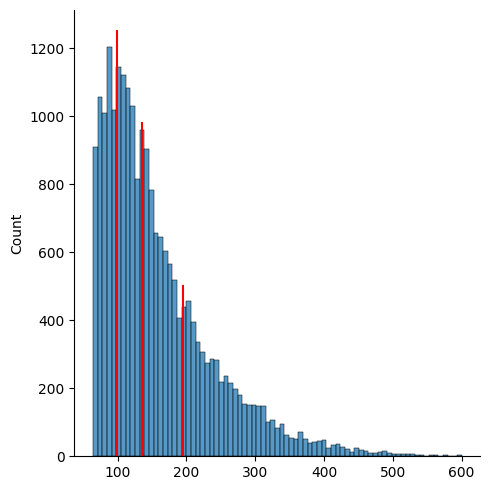

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

train_ls = np.array(train_ls)
sns.displot(train_ls)

plt.plot([99,99], [0, 1250], color='red')
plt.plot([136,136], [0, 980], color='red')
plt.plot([195,195], [0, 500], color='red')



In [42]:
max(train_ls)

600